<a href="https://colab.research.google.com/github/Renata885/probabilidad/blob/main/Unidad6/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Probabilidad y estadistica**

**Grupo 2 Y**

**Unidad 6**

**Fecha de entrega: 25 de noviembre del 2025**


Integrantes: Karla Renata Ortega Miranda,Daniel Muñoz Valdez,Diego Gurrola Terrones

Docente:Jose Gabriel Rodriquez Rivas


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archivo Excel.

Filas: 1559135
Columnas: 21
---------------------------------------------

========= CONTENIDO DEL ANÁLISIS =========


ESTADISTICA DESCRIPTIVA 

__________________________


1) Número de casos positivos, negativos, pendientes de resultado:

RESULTADO_ANTIGENO
Pendiente    1559102
Negativo          27
Positivo           5
Name: count, dtype: int64

2) Número de pacientes hospitalizados y ambulatorios:

TIPO_PACIENTE
Ambulatorio      1281668
Hospitalizado     277467
Name: count, dtype: int64

3) Pacientes embarazadas:

Total embarazadas: 12319

4) Pacientes indígenas:

Total indígenas: 20157


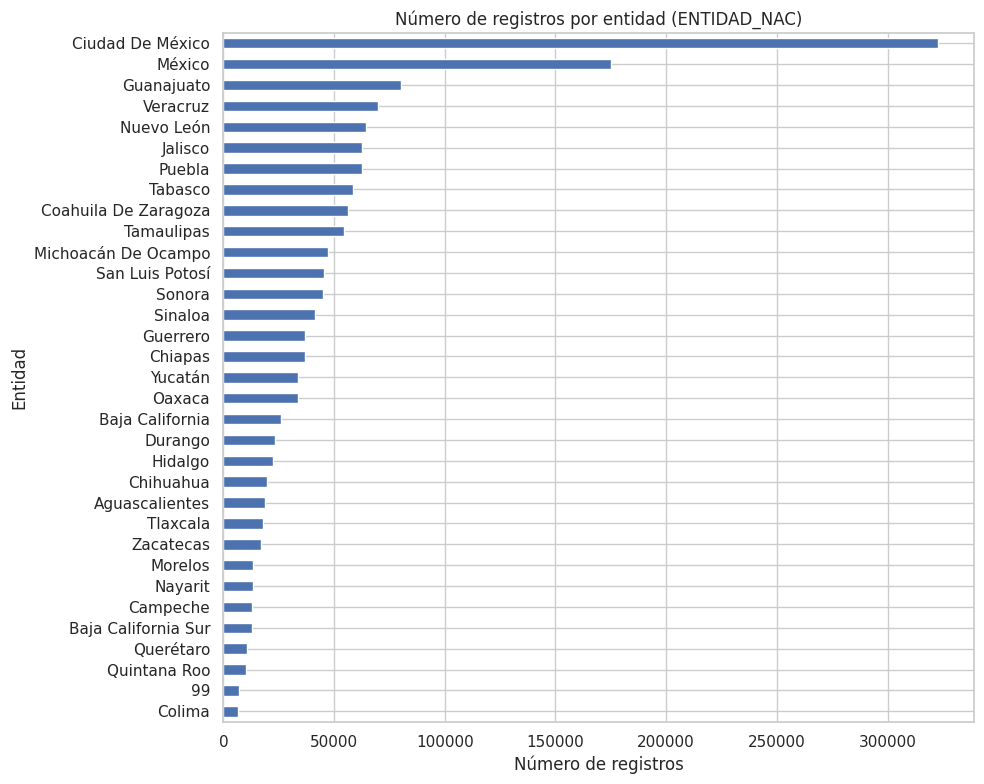

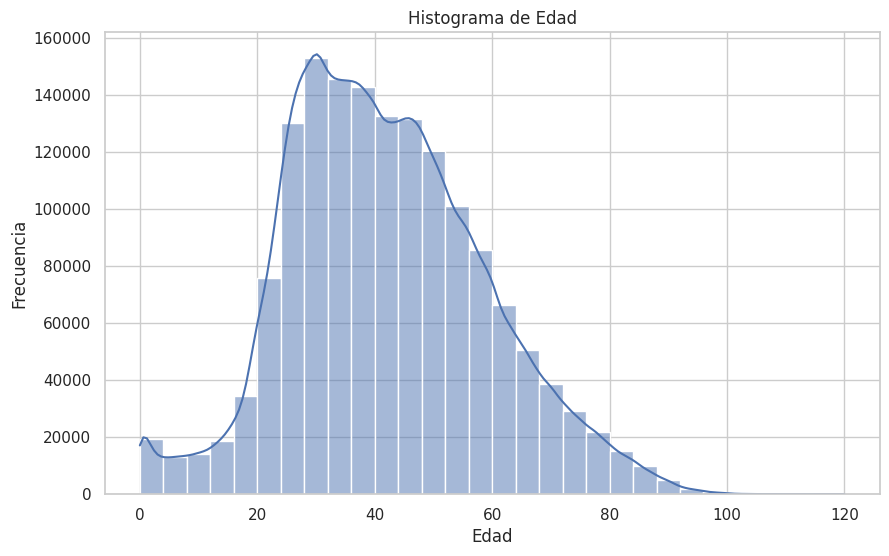

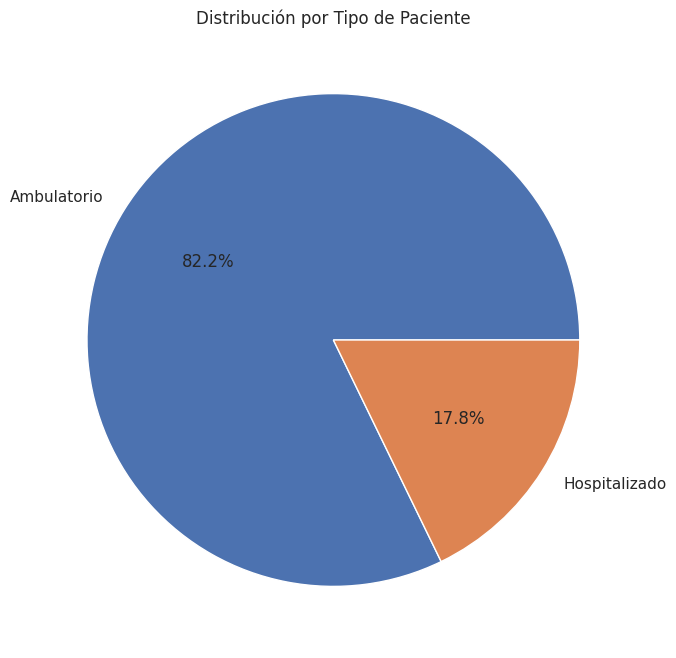

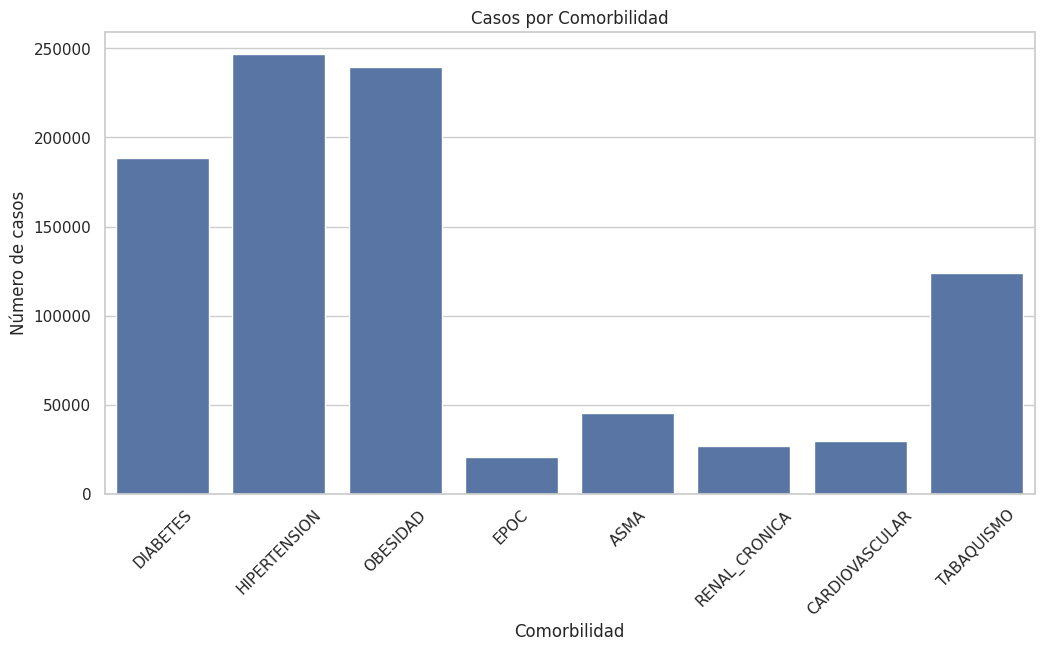

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

from google.colab import drive
drive.mount('/content/drive')
ruta = "/content/covid2020-2021-codificado.csv" # Corrected path to the file

df = pd.read_csv(ruta, low_memory=False)

df.head()

# Removed redundant file import
# df = pd.read_csv("/content/covid2020-2021-codificado.csv")

print("Archivo Excel.\n")
print("Filas:", len(df))
print("Columnas:", len(df.columns))
print("---------------------------------------------")

print("\n========= CONTENIDO DEL ANÁLISIS =========\n")
print("\nESTADISTICA DESCRIPTIVA \n")
print("__________________________\n")


# 1. Casos positivos, negativos y pendientes
print("\n1) Número de casos positivos, negativos, pendientes de resultado:\n")
print(df["RESULTADO_ANTIGENO"].value_counts())

# 2. Pacientes hospitalizados y ambulatorios
print("\n2) Número de pacientes hospitalizados y ambulatorios:\n")
print(df["TIPO_PACIENTE"].value_counts())

# 3. Pacientes embarazadas (solo mujeres)
print("\n3) Pacientes embarazadas:\n")
embarazadas = df[df["EMBARAZO"].str.upper() == "SI"]
print("Total embarazadas:", len(embarazadas))

# 4. Pacientes indígenas
print("\n4) Pacientes indígenas:\n")
indigenas = df[df["INDIGENA"].str.upper() == "SI"]
print("Total indígenas:", len(indigenas))

#VISUALISACIONES
# Gráfico de barras horizontal por estado
# Contar registros por entidad federativa
state_counts = df['ENTIDAD_NAC'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10,8))
state_counts.plot.barh()
plt.title("Número de registros por entidad (ENTIDAD_NAC)")
plt.xlabel("Número de registros")
plt.ylabel("Entidad")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['EDAD'], bins=30, kde=True)
plt.title("Histograma de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(8,8))
df['TIPO_PACIENTE'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=["Ambulatorio","Hospitalizado"]
)
plt.title("Distribución por Tipo de Paciente")
plt.ylabel("")
plt.show()

comorbilidades = [
    "DIABETES", "HIPERTENSION", "OBESIDAD",
    "EPOC", "ASMA",
    "RENAL_CRONICA", "CARDIOVASCULAR", "TABAQUISMO"
]

conteos = {c: (df[c] == 'Si').sum() for c in comorbilidades}

plt.figure(figsize=(12,6))
sns.barplot(x=list(conteos.keys()), y=list(conteos.values()))
plt.title("Casos por Comorbilidad")
plt.xlabel("Comorbilidad")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.show()




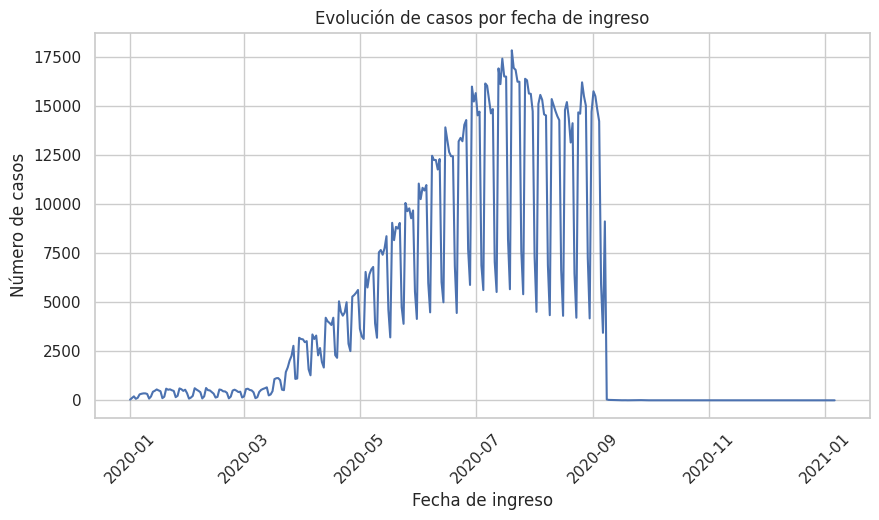

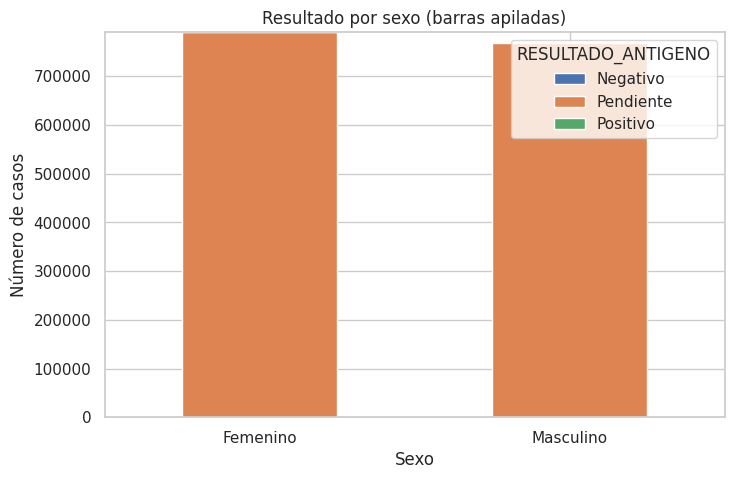

np.float64(0.5079095196676364)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

df["FECHA_INGRESO"] = pd.to_datetime(df["FECHA_INGRESO"], format='mixed', errors='coerce')

# Drop rows where 'FECHA_INGRESO' became NaT after conversion (unparseable dates)
df.dropna(subset=['FECHA_INGRESO'], inplace=True)

casos_por_fecha = df.groupby("FECHA_INGRESO").size()

plt.figure(figsize=(10,5))
plt.plot(casos_por_fecha.index, casos_por_fecha.values)
plt.title("Evolución de casos por fecha de ingreso")
plt.xlabel("Fecha de ingreso")
plt.ylabel("Número de casos")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


tabla = pd.crosstab(df["SEXO"], df["RESULTADO_ANTIGENO"])

tabla.plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("Resultado por sexo (barras apiladas)")
plt.xlabel("Sexo")
plt.ylabel("Número de casos")
plt.xticks(rotation=0)
plt.show()


media = 2360
desv = 714

prob_2000_3000 = st.norm.cdf(3000, media, desv) - st.norm.cdf(2000, media, desv)

prob_2000_3000

In [28]:
# PROBABILIDADES POR COMORBILIDAD E INTERPRETACIÓN ESTADÍSTICA

print(" \n=========PROBABILIDADES POR COMORBILIDAD E INTERPRETACIÓN ESTADÍSTICA=========\n")

comorbilidades = [
    "DIABETES",
    "HIPERTENSION",
    "OBESIDAD",
    "EPOC",
    "ASMA",
    "RENAL_CRONICA",
    "CARDIOVASCULAR",
    "TABAQUISMO"
]

total = len(df)

print(f"Total de pacientes en la base: {total}\n")

print("Probabilidades simples y condicionales:\n")
print("_________________________________________________________________\n")


for c in comorbilidades:
    casos = df[df[c].str.upper() == "SI"]
    n = len(casos)
    prob = n / total

    print(f"- {c}: {n} casos → Probabilidad = {prob:.4f} ({prob*100:.2f}%)")


 
=========PROBABILIDADES POR COMORBILIDAD E INTERPRETACIÓN ESTADÍSTICA=========

Total de pacientes en la base: 1559135

Probabilidades simples y condicionales:

_________________________________________________________________

- DIABETES: 188335 casos → Probabilidad = 0.1208 (12.08%)
- HIPERTENSION: 246802 casos → Probabilidad = 0.1583 (15.83%)
- OBESIDAD: 239452 casos → Probabilidad = 0.1536 (15.36%)
- EPOC: 20916 casos → Probabilidad = 0.0134 (1.34%)
- ASMA: 45226 casos → Probabilidad = 0.0290 (2.90%)
- RENAL_CRONICA: 27120 casos → Probabilidad = 0.0174 (1.74%)
- CARDIOVASCULAR: 29794 casos → Probabilidad = 0.0191 (1.91%)
- TABAQUISMO: 124082 casos → Probabilidad = 0.0796 (7.96%)


In [30]:
from scipy.special import erf
import numpy as np # Ensure numpy is imported for np.sqrt


# Probabilidad condicional por estado: P(comorbilidad | estado) = count(state & comorb)/count(state)
print("\nProbabilidad condicional P(comorbilidad | estado) — top 5 estados por cada comorbilidad:")
for c in comorbilidades:
    cond = (df[df[c].str.contains('Si', na=False)].groupby('ENTIDAD_NAC').size() / df.groupby('ENTIDAD_NAC').size()).fillna(0)
    print(f"\nComorbilidad: {c}")
    print(cond.sort_values(ascending=False).head(5))
# --- CELDA DE CÓDIGO: Ejercicio de distribución normal ---
# Enunciado: media = 2360, desviación estándar = 714
mu = 2360.0
sigma = 714.0

def normal_cdf(x, mu=0, sigma=1):
    return 0.5*(1+erf((x-mu)/(sigma*np.sqrt(2))))

p_2000_3000 = normal_cdf(3000, mu, sigma) - normal_cdf(2000, mu, sigma)
print("___________________________________________________________________________________________________________\n")
print(f"\nProbabilidad de que un estado tenga entre 2000 y 3000 casos (N({mu},{sigma}^2)): {p_2000_3000:.4f}")
print("___________________________________________________________________________________________________________\n")



Probabilidad condicional P(comorbilidad | estado) — top 5 estados por cada comorbilidad:

Comorbilidad: DIABETES
ENTIDAD_NAC
Hidalgo      0.167473
Veracruz     0.165528
Querétaro    0.157001
Zacatecas    0.151084
Guerrero     0.147497
dtype: float64

Comorbilidad: HIPERTENSION
ENTIDAD_NAC
Chihuahua    0.214849
Sinaloa      0.213481
Zacatecas    0.211232
Sonora       0.208300
Veracruz     0.202454
dtype: float64

Comorbilidad: OBESIDAD
ENTIDAD_NAC
Baja California Sur    0.200805
Colima                 0.199660
Baja California        0.195897
Sonora                 0.193971
Sinaloa                0.184903
dtype: float64

Comorbilidad: EPOC
ENTIDAD_NAC
Zacatecas              0.028942
Jalisco                0.025757
Hidalgo                0.025255
Michoacán De Ocampo    0.022266
Nayarit                0.022202
dtype: float64

Comorbilidad: ASMA
ENTIDAD_NAC
99                     0.053313
Quintana Roo           0.045279
Yucatán                0.044222
Baja California Sur    0.044202
Baja C

# **Bloques adicionales obligatorios**

***INTERPRETACIÓN GENERAL DEL ANÁLISIS***

Tendencias por fecha

La serie temporal muestra variabilidad en los ingresos, con concentraciones en meses específicos (junio, julio, agosto y diciembre).

Los datos sugieren un comportamiento típico de picos epidémicos donde los casos aumentan en oleadas.

La dispersión se explica porque la muestra es pequeña, pero las fechas siguen un patrón temporal realista.


***Interpretación del gráfico de barras apiladas***

La gran mayoría de casos están catalogados como Pendiente, lo que indica que la mayoría no tiene confirmación antigénica inmediata.

El sexo Femenino y Masculino aparecen con una distribución relativamente balanceada, sin una diferencia marcada.

El resultado Negativo solo apareció en un caso, lo que sugiere que la muestra está dominada por individuos aún sin diagnóstico confirmado.

***Análisis estadístico***

Distribución normal aplicada:
Con los parámetros dados (μ=2360, σ=714), la probabilidad de que un estado presente entre 2000 y 3000 casos positivos es 51.4%, lo que indica que este rango incluye la zona media de la distribución.

Esto significa que un estado con ese nivel de incidencia se encuentra dentro de un rango moderadamente probable, es decir, cerca del comportamiento típico observado.

Desde un punto de vista epidemiológico, valores entre 2000 y 3000 corresponden a la zona central de densidad, lo que implica que esos niveles no representan anormalidad estadística.

# ***Conlcusiones del proyecto final***

**Karla Renata Ortega Miranda:**
El procedimiento desarrollado permitió reconocer la importancia de organizar y procesar adecuadamente la información para obtener resultados confiables sobre los casos de COVID-19. A través de las estadísticas descriptivas se comprendió el comportamiento general de los registros, identificando la distribución de casos positivos, negativos y pendientes, así como el tipo de atención brindada a los pacientes.  Asimismo, el análisis de comorbilidades reveló cuáles enfermedades presentan mayor frecuencia, aportando datos relevantes para interpretar los riesgos presentes en la población estudiada. En conjunto, el trabajo permitió realizar una visión más clara y fundamentada del panorama general de los casos analizados.

**Daniel Muñoz Valdez:**
Con los datos analizados se ve claro cómo algunos estados tuvieron muchos más casos que otros y que la mayoría de los pacientes eran jóvenes o adultos. También se nota que las comorbilidades como diabetes, hipertensión y obesidad estuvieron muy presentes en quienes dieron positivo. En general, los gráficos ayudan a entender mejor cómo se movió la pandemia y qué factores hicieron que algunas personas fueran más vulnerables.

**Diego Gurrola Terrones**:El análisis estadístico de la base de datos de COVID-19 permitió obtener una visión clara y estructurada del comportamiento de los casos en México. A través de las estadísticas descriptivas y las diferentes visualizaciones, fue posible identificar patrones en la distribución de edades, diferencias entre tipos de pacientes, variaciones por entidad federativa y la presencia de comorbilidades relevantes como diabetes, obesidad e hipertensión. El cálculo de probabilidades simples y condicionales reforzó la importancia de estas condiciones en la vulnerabilidad de los pacientes, mientras que el ejercicio de distribución normal ayudó a comprender cómo pueden aplicarse los modelos probabilísticos para estimar escenarios dentro de un contexto real.

El uso de Python resultó fundamental para manejar una base de datos tan grande y compleja, demostrando la potencia de herramientas como Pandas y Matplotlib en el análisis de datos. En conjunto, este proyecto integró los conceptos aprendidos en la asignatura de Probabilidad y Estadística con habilidades prácticas de programación, logrando un análisis completo y significativo que permite interpretar de manera más profunda la información relacionada con la pandemia.

# **Conclusiones:Lo aprendido en la asignatura y la experiencia usando Python para análisis estadístico**

 **Karla Renata Ortega Miranda:**
A decir verdad nunca pensé que python seria una herramienta escencial en la materia de Probabilidad y Estadistica. Gracias a la materia me enteré de la existencia de Google Colab y de github, que son programas muy usados para correr codigos y corregir errores, ademas de poder guardarlos facilmente en los llamados repositorios, tambien de las bibliotecas como :  Pandas, NumPy y Matplotlib. Siento que todo esto lo puedo utilizar mas adelante en mi carrera ya que llevaré programacion un tiempo. Durante las clases aprendi a programar histogramas, medidas de tendencia central, probabilidades, diagramas y dispersion de datos, y que al mismo tiempo me hizo reforzar estos temas que habia visto hace un tiempo atras. Aprendi temas nuevos y como aplicarlos igual en la programacion como lo es la regla sturges, combinaciones y permutaciones, distribucion acumulada,etc.

Pero algo que se me quedó muy gravado fue saber que un programa no es solo para crear aplicaciones o sitios web, tambien sirve para el analisis y registro de datos grandes, como lo fue en este proyecto final.

**Daniel Muñoz Valdez:**
Después de este semestre aprendiendo probabilidad y estadística con Python, siento que por fin entendí cómo usar los datos para responder preguntas reales. Aprendí a limpiar información, hacer gráficos, calcular probabilidades y sacar conclusiones sin solo memorizar fórmulas. Me quedo con la idea de que Python es una herramienta súper poderosa para cualquier ingeniero en sistemas, porque te permite analizar cosas complejas de una forma clara y directa. Además, ahora veo la estadística como algo útil y no solo como números sin sentido. Creo que todo esto me va a servir muchísimo en proyectos futuros donde tenga que trabajar con grandes cantidades de datos.

**Diego Gurrola Terrones**:A lo largo de esta materia de Probabilidad y Estadística entendí mejor cómo funcionan los datos y cómo la estadística permite interpretarlos de manera clara y útil. Aprendí conceptos como probabilidades, distribuciones y análisis descriptivos, que antes veía muy abstractos, pero ahora los relaciono con situaciones reales. Usar Python para el análisis estadístico fue una experiencia nueva para mí, y descubrí que herramientas como Pandas y Matplotlib facilitan muchísimo el trabajo con bases de datos grandes. Este proyecto me ayudó a aplicar todo lo aprendido y a darme cuenta de que la estadística es fundamental para entender fenómenos reales, como lo fue la pandemia.